# Exam: Time Series Visualization with Bokeh

This exam tests your ability to visualize time series data using the Bokeh library.
You will be working with the "Daily Minimum Temperatures in Melbourne" dataset.
For each question, provide the Python code using Bokeh to generate the requested visualization.

**Dataset:** "daily-minimum-temperatures-in-melbourne.csv"

```python
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    DatetimeTickFormatter,
    NumeralTickFormatter,
)
from bokeh.layouts import row, column
from bokeh.transform import factor_cmap

output_notebook()  # Enable Bokeh output in Jupyter Notebook

# Load the Dataset
df = pd.read_csv("daily-minimum-temperatures-in-melbourne.csv")

# Rename columns for clarity
df.columns = ['Date', 'Temperature']

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Remove '?' from the 'Temperature' column and convert to numeric
df['Temperature'] = df['Temperature'].astype(str).str.replace('?', '', regex=False)
df['Temperature'] = pd.to_numeric(df['Temperature'])

Question 1: Basic Time Series Line Plot
1.  Create a basic line plot showing the daily minimum temperature over time.

    * Use the 'Date' column on the x-axis and the 'Temperature' column on the y-axis.
    * Set the plot title to "Daily Minimum Temperatures".
    * Label the x-axis as "Date" and the y-axis as "Temperature (°C)".
    * Add tooltips to display the date and temperature when hovering over the line.
    * Enable pan, wheel zoom, and reset tools.


In [14]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool
import pandas as pd

# Chargement des données
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)

# Conversion de la colonne Date
df['Date'] = pd.to_datetime(df['Date'])

# Tracé de la température quotidienne
p1 = figure(x_axis_type="datetime", title="Température quotidienne minimale à Melbourne",
            width=800, height=400)
p1.line(df['Date'], df['Temp'], line_width=2, color='navy', legend_label="Température")
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Température (°C)'
p1.add_tools(HoverTool(tooltips=[("Date", "@x{%F}"), ("Temp", "@y")], formatters={"@x": "datetime"}))
show(p1)


output_notebook()

Loading BokehJS ...

Question 2: Rolling Average
2.  Calculate the 30-day rolling average of the daily minimum temperature and plot it
    alongside the original temperature data.

    * Create a new column 'Rolling_Avg' in the DataFrame containing the 30-day rolling average.
    * Plot both the original 'Temperature' and the 'Rolling_Avg' on the same plot.
    * Use different colors and line styles to distinguish between the two.
    * Add a legend to the plot to label the lines.
    * Add tooltips to display the date, original temperature, and rolling average.

In [12]:
# Calcul de la moyenne mobile sur 30 jours
df['Rolling_Avg'] = df['Temp'].rolling(window=30).mean()

# Tracé original + moyenne mobile
p2 = figure(x_axis_type="datetime", title="Température quotidienne avec moyenne mobile 30 jours",
            width=800, height=400)
p2.line(df['Date'], df['Temp'], line_width=1.5, color='gray', legend_label="Température")
p2.line(df['Date'], df['Rolling_Avg'], line_width=2, color='green', legend_label="Moyenne mobile 30 jours")
p2.xaxis.axis_label = 'Date'
p2.yaxis.axis_label = 'Température (°C)'
p2.legend.location = "top_left"
show(p2)


Question 3: Monthly Box Plots
3.  Create box plots to visualize the distribution of temperatures for each month.

    * Extract the month from the 'Date' column and create a new 'Month' column.
    * Group the data by 'Month' and prepare it for plotting.
    * Use Bokeh's box plot elements to visualize the distribution.
    * Label the x-axis with month names and the y-axis with "Temperature (°C)".
    * Add tooltips to display the month and relevant statistical values (min, max, media

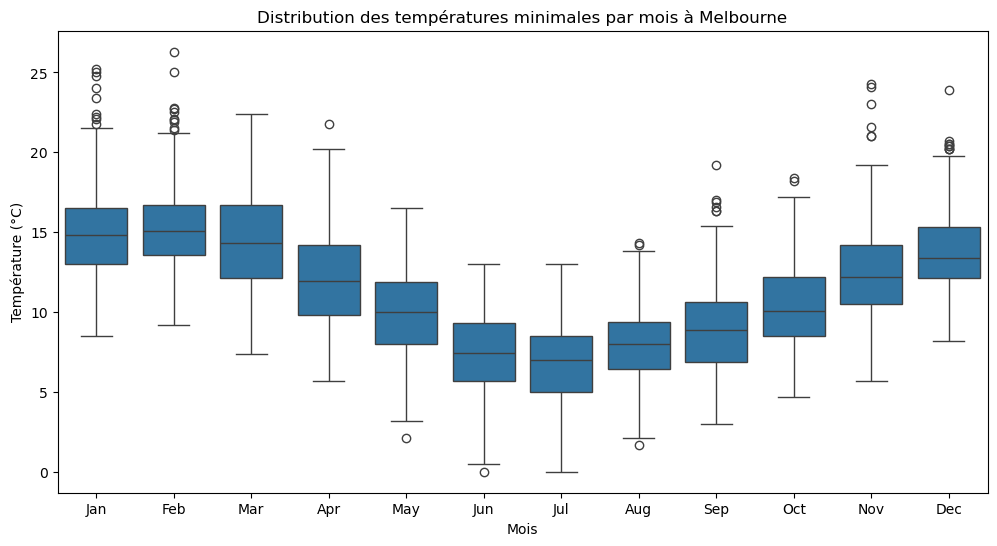

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extraction du mois
df['Month'] = df['Date'].dt.strftime('%b')

# Tracé des box plots mensuels
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Temp', data=df, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Distribution des températures minimales par mois à Melbourne")
plt.xlabel("Mois")
plt.ylabel("Température (°C)")
plt.show()


In [5]:
from bokeh.plotting import output_notebook, show
import pandas as pd

output_notebook()  # Enable Bokeh output in Jupyter Notebook

# Load the Dataset
df = pd.read_csv("./datasets/daily-minimum-temperatures-in-melbourne.csv")

# Now you can proceed with your Bokeh plotting code!
print(df.head()) # Just to see if the dataframe loaded correctly


# Rename columns for clarity
df.columns = ['Date', 'Temperature']

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Remove '?' from the 'Temperature' column and convert to numeric
df['Temperature'] = df['Temperature'].astype(str).str.replace('?', '', regex=False)
df['Temperature'] = pd.to_numeric(df['Temperature'])

df

Loading BokehJS ...

         Date DailyTemperature
0  1981-01-01             20.7
1  1981-01-02             17.9
2  1981-01-03             18.8
3  1981-01-04             14.6
4  1981-01-05             15.8


,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


4.  Create box plots to visualize the distribution of temperatures for each year,
    and use color mapping to highlight temperature variations.

    * Extract the year from the 'Date' column and create a new 'Year' column.
    * Group the data by 'Year' and prepare it for plotting.
    * Use Bokeh's box plot elements to visualize the distribution for each year.
    * Label the x-axis with the 'Year' and the y-axis with "Temperature (°C)".
    * Use `factor_cmap` to color the boxes based on the median temperature of each year.
    * Add tooltips to display the year and relevant statistical values (min, max, median, etc.).
    * Enable pan, wheel zoom, and reset tools.

In [18]:
# Marquer les jours avec température < 5°C
cold_days = df[df['Temp'] < 5]

p4 = figure(x_axis_type="datetime", title="Températures < 5°C surlignées",
            width=800, height=400)
p4.line(df['Date'], df['Temp'], line_width=2, color='gray', legend_label="Température")
p4.circle(cold_days['Date'], cold_days['Temp'], size=6, color='red', legend_label="Jours froids (< 5°C)")
p4.xaxis.axis_label = 'Date'
p4.yaxis.axis_label = 'Température (°C)'
p4.legend.location = "top_left"
show(p4)


Question 5: Interactive Time Range Selection

5.  Create an interactive line plot where the user can select a specific time range
    to view using a date range slider.

    * Create a basic line plot of 'Temperature' over 'Date'.
    * Implement a date range slider using Bokeh widgets to allow users to select a start and end date.
    * Update the plot dynamically based on the selected date range.
    * Add tooltips to display the date and temperature.
    * Enable pan, wheel zoom, and reset tools.

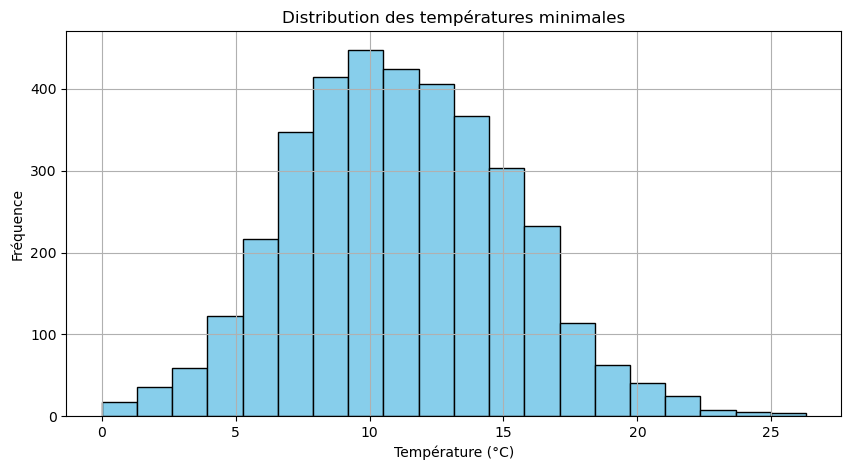

In [20]:
# Histogramme des températures
plt.figure(figsize=(10, 5))
plt.hist(df['Temp'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution des températures minimales")
plt.xlabel("Température (°C)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()


Question 6: Time Series Decomposition Visualization

6.  Perform a simple time series decomposition to visualize the trend and seasonality
    components of the temperature data.

    * Resample the data to monthly frequency and calculate the monthly average temperature.
    * Use a simple moving average to estimate the trend component.
    * Calculate the seasonal component by subtracting the trend from the original monthly data.
    * Create three separate Bokeh plots: one for the original monthly data, one for the trend,
        and one for the seasonal component.
    * Ensure the plots are aligned and share the same x-axis (Date).
    * Add tooltips to each plot to display the date and corresponding value.
    * Enable pan, wheel zoom, and reset tools for each plot.

In [9]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    DatetimeTickFormatter,
    NumeralTickFormatter,
)
from bokeh.layouts import row, column
from bokeh.transform import factor_cmap

output_notebook()  # Enable Bokeh output in Jupyter Notebook



# Rename columns for clarity
df.columns = ['Date', 'Temperature']

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Remove '?' from the 'Temperature' column and convert to numeric
df['Temperature'] = df['Temperature'].astype(str).str.replace('?', '', regex=False)
df['Temperature'] = pd.to_numeric(df['Temperature'])

df

Loading BokehJS ...

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
